# STA 208: Homework 3
This is based on the material in Chapter 4 of 'Elements of Statistical Learning' (ESL), in addition to lectures 7-8.  Chunzhe Zhang came up with the dataset and the analysis in the second section.

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

When writing pseudocode, you should use enumerated lists, such as 

__Algorithm: Ordinary Least Squares Fit__
(Input: X, y; 
Output: $\beta$)
1. Initialize the $p \times p$ Gram matrix, $G \gets 0$, and the vector $b \gets 0$.
2. For each sample, $x_i$:
 1. $G \gets G + x_i x_i^\top$.
 2. $b \gets b + y_i x_i$
3. Solve the linear system $G \beta = b$ and return $\beta$


__Exercise 1.1__ (10 pts - 2 each)

Recall that surrogate losses for large margin classification take the form, $\phi(y_i x_i^\top \beta)$ where $y_i \in \{-1,1\}$ and $\beta, x_i \in \mathbb R^p$.

The following functions are used as surrogate losses for large margin classification.  Demonstrate if they are convex or not, and follow the instructions.

1. exponential loss: $\phi(x) = e^{-x}$
1. truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$
1. hinge loss: $\phi(x) = \max\{1-x,0\}$
1. sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$
1. Plot these as a function of $x$.

(This problem is due to notes of Larry Wasserman.) 


In [26]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

__1. Exponential Loss__  
First, $\phi'(x) = -e^{-x}$.  
Now, $\phi''(x) = e^{-x}$, which is $>0 \ \ \forall x$. Thus, it is convex.  
The plot is below. 

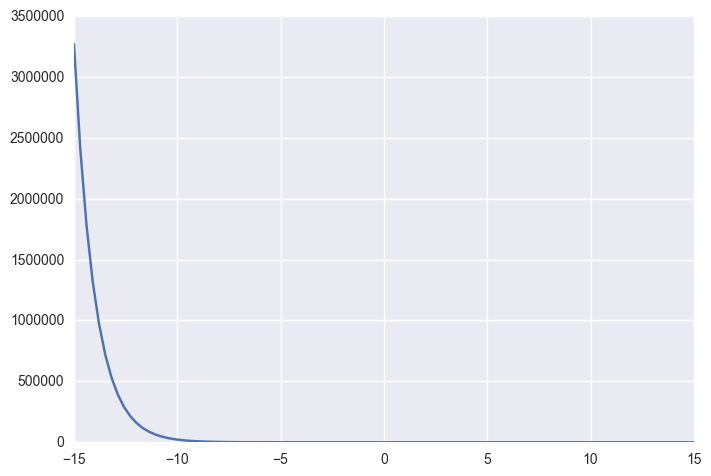

In [22]:
x1 = np.linspace(-15,15,100) 
y1 = np.exp(-x1) 
plt.title('Exponential Loss')
plt.plot(x1,y1)
plt.show()

__2. Truncated Quadratic Loss__  
First, $\phi'(x) = (2x-2)1_{\{x \le 1\}}$.  
Now, $\phi''(x) = 2*1_{\{x \le 1\}}$, which is $>0 \ \ \forall x \le 1$.  
Thus, this loss is only convex for $x \le 1$.  
The plot is below. 

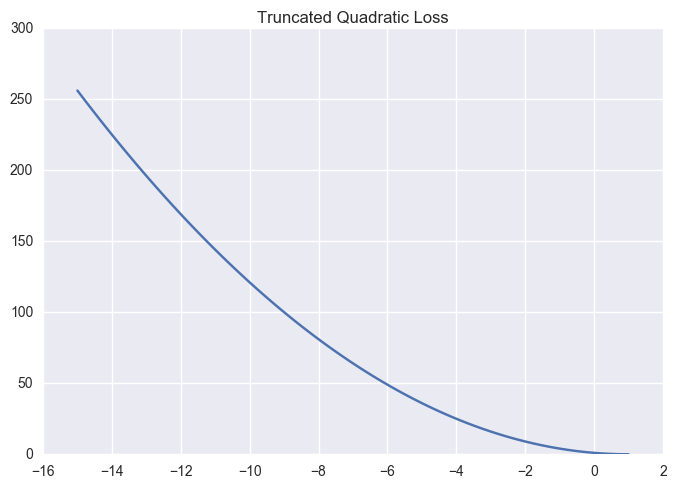

In [23]:
x2 = np.linspace(-15,1,100) 
y2 = np.power(1-x2,2)
plt.title('Truncated Quadratic Loss')
plt.plot(x2,y2)
plt.show()

__3. Hinge Loss__  
First, $\phi'(x) = (-1)1_{\{x \le 1\}}$.  
Now, $\phi''(x) = 0$.  
Thus, hinge loss is not convex anywhere.  
The plot is below. 

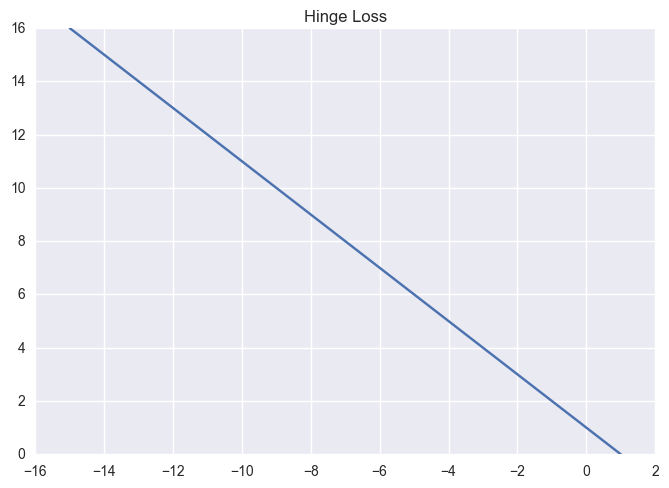

In [24]:
x3 = np.linspace(-15,1,100) 
y3 = 1-x3 
plt.title('Hinge Loss')
plt.plot(x3,y3)
plt.show()

__4. Sigmoid Loss__  
First, $\phi'(x) = -ksech^2(kx)$.  
Now, $\phi''(x) = 2k^2tanh(kx)sech^2(kx)$, which is positive for $x > 0$.  
Thus, this loss is convex for $x>0$.  
The plot is below. 

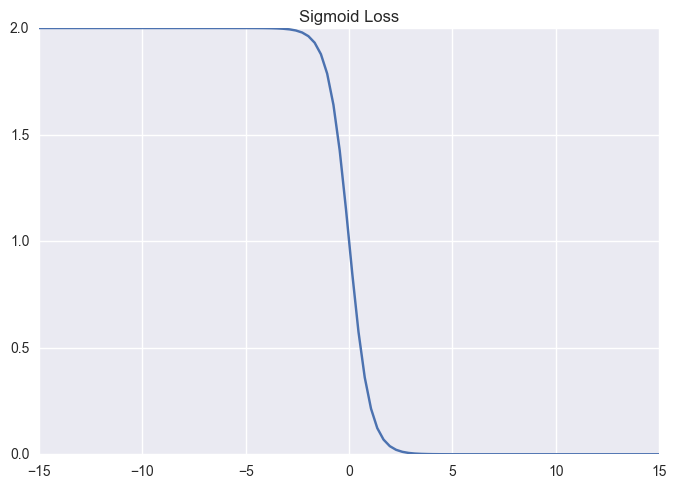

In [25]:
x4 = np.linspace(-15,15,100) 
y4 = 1-np.tanh(x4) 
plt.title('Sigmoid Loss')
plt.plot(x4,y4)
plt.show()

__Exercise 1.2__ (10 pts)

Consider the truncated quadratic loss from (1.1.2).  For brevity let $a_+ = max\{a,0\}$ denote the positive part of $a$.

$$\ell(y_i,x_i,\beta) = \phi(y_i x_i^\top \beta) = (1-y_i x_i^\top \beta)_+^2$$

1. Consider the empirical risk, $R_n$ (the average loss over a training set) for the truncated quadratic loss.  What is gradient of $R_n$ in $\beta$?  Does it always exists?
1. Demonstrate that the gradient does not have continuous derivative everywhere.
1. Recall that support vector machines used the hinge loss $(1 - y_i x_i^\top)_+$ with a ridge regularization.  Write the regularized optimization method for the truncated quadratic loss, and derive the gradient of the regularized empirical risk.
1. Because the loss does not have continuous Hessian, instead of the Newton method, we will use a quasi-Newton method that replaces the Hessian with a quasi-Hessian (another matrix that is meant to approximate the Hessian).  Consider the following quasi-Hessian of the regularized objective to be $$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta > 1 \}) + 2 \lambda.$$  Demonstrate that the quasi-Hessian is positive definite, and write pseudo-code for quasi-Newton optimization.  (There was a correction in the lectures, that when minimizing a function you should subtract the gradient $\beta \gets \beta - H^{-1} g$).

#### Solutions

__1.__ First, we compute the gradient of $\ell (y_i, x_i, \beta)$ in $\beta$. 
Expanding, we have $\ell(y_i,x_i,\beta) = (1-y_ix_{i1}\beta_0-...-y_ix_{ip}\beta_{p-1})_+^2$.  
For ease of notation, let $w = (1-y_ix_{i1}\beta_0-...-y_ix_{ip}\beta_{p-1})$  
Now, $\nabla_\beta\ell = (\partial_{\beta_0}\ell,...,partial_{\beta_{p-1}}\ell = (-2y_ix_{i1}w,...,-2y_ix_{ip}w)$.  
So $\nabla_\beta R_n = \frac{1}{n}\sum_i(-2y_ix_{i1}w,...,-2y_ix_{ip}w)1_{\{y_ix_i^\top\beta \le 1\}}$  
__2.__ The gradient does not have continuous derivative at $y_ix_i^\top\beta = 1$.  
__3.__ For truncated quadratic loss, the regularized optimization problem is  
$\min_{\beta} \sum_i(1-y_ix_i^\top\beta)_+^2 + \lambda ||\beta||_2^2$,  
with $\nabla_\beta\lambda||\beta||_2^2 = (\frac{\lambda\beta_0}{||\beta||_2^2},...,\frac{\lambda\beta_p}{||\beta||_2^2})$.  
Thus, $\nabla_\beta R_n^* = \frac{1}{n}\sum_i(-2y_ix_{i1}w,...,-2y_ix_{ip}w)1_{\{y_ix_i^\top\beta \le 1\}} + (\frac{\lambda\beta_0}{||\beta||_2^2},...,\frac{\lambda\beta_p}{||\beta||_2^2})$.  
__4.__ Psuedo-code for quasi-Newton method: 
1. Start with initial estimate for $\beta: \beta^{(0)}$
2. For $t = 0,1,...$, compute  
$\beta^{(t+1)} = \beta^{(t)} - \frac{\nabla_\beta R_n^*}{G(\beta)}$

# HW3 Logistic, LDA, SVM

In [1]:
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn import preprocessing, svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# dataset path
data_dir = "~/Dropbox/208/208-HW3-pamelot317"

The following code reads the data, subselects the $y$ and $X$ variables, and makes a training and test split.  This is the Abalone dataset and we will be predicting the age. V9 is age, 1 represents old, 0 represents young. 

In [2]:
sample_data = pd.read_csv(data_dir+"/hw3.csv", delimiter=',')
sample_data.V1=sample_data.V1.factorize()[0]

X = np.array(sample_data.iloc[:,range(0,8)])
y = np.array(sample_data.iloc[:,8])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

__Exercise 2.1__ (10 pts) Perform logistic regression using Newton conjugate gradient.  You should save the predicted probabilities, and save the roc and pr curves (using roc_curve and precision_recall_curve) computed using the test set.

In [3]:
clf = skl_lm.LogisticRegression(solver='newton-cg') #use Newton conjugate gradient#
clf.fit(X_train,y_train)
prob1 = clf.predict_proba(X_test)
y_score1 = clf.fit(X_train, y_train).decision_function(X_test)
fpr1, tpr1, roc_thresholds1 = roc_curve(y_test, y_score1) 
precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_score1)

__Exercise 2.2__ (10 pts) Do the same for linear discriminant analysis.

In [4]:
lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)
pred_p = lda.predict_proba(X_test)
y_score2 = lda.fit(X_train, y_train).decision_function(X_test)
fpr2, tpr2, roc_thresholds2 = roc_curve(y_test, y_score2)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_score2)

__Exercise 2.3__ (10 pts) Do the same for support vector machines.

In [5]:
svm1 = svm.SVC(probability=True)
svm1.fit(X_train, y_train)
prob2 = svm1.predict_proba(X_test)
y_score3 = svm1.fit(X_train, y_train).decision_function(X_test)
fpr3, tpr3, roc_thresholds3 = roc_curve(y_test, y_score3)
precision3, recall3, thresholds3 = precision_recall_curve(y_test, y_score3)

__Exercise 2.4__ (10 pts) Plot and compare the ROC and PR curves for the above methods.

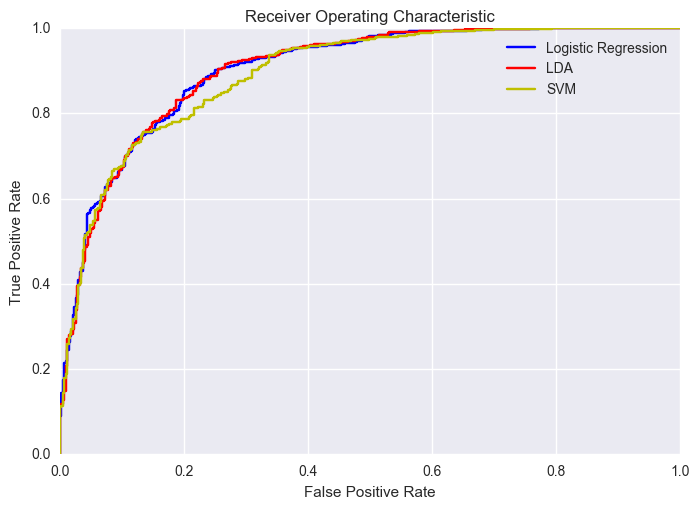

In [15]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1,tpr1,'b-',label='Logistic Regression')
plt.plot(fpr2,tpr2,'r-',label='LDA')
plt.plot(fpr3,tpr3,'y-',label='SVM')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.show()

The ROC curves look very similar among the three methods. Overall, the methods did well in terms of prediction, with better tpr comparied to fpr. However, it appears that SVM did not perform quite as well as the others, though it still did well. 

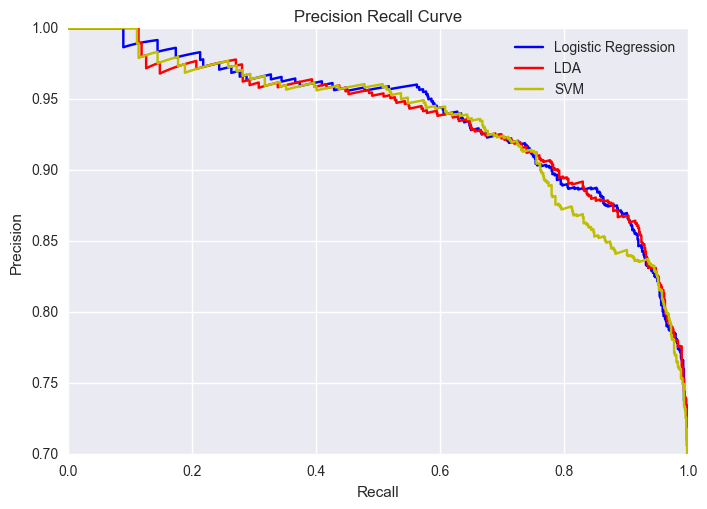

In [16]:
plt.title('Precision Recall Curve')
plt.plot(recall1,precision1,'b-',label='Logistic Regression')
plt.plot(recall2,precision2,'r-',label='LDA')
plt.plot(recall3,precision3,'y-',label='SVM')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc='best')
plt.show()

Overall, the three methods have similar precision recall curves, though it appears that SVM is not as good at higher recall than the other two methods. 